## Autoregressive model
#### Creating data points that follow a sin wave, and then building a model to forecast future values of the data

In [3]:
import tensorflow as tf

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#### Creating sin wave data

In [5]:
x_sin = np.sin(0.1*np.arange(200)) #+ 0.1*np.random.rand()

In [ ]:
D = 10
X = []
Y = []
for t in range(len(x_sin)-D):
  X.append(x_sin[t:t+D])
  Y.append(x_sin[t+D])

In [ ]:
X = np.array(X)

In [ ]:
Y = np.array(Y)

#### Splitting the data into training and testing

In [ ]:
N = len(X)
x_train = X[:-N//2]
x_test = X[-N//2:]
y_train = Y[:-N//2]
y_test = Y[-N//2:]

#### Building & Training the model

In [ ]:
i = tf.keras.layers.Input(shape = (D,))
x = tf.keras.layers.Dense(1)(i)
model = tf.keras.models.Model(i,x)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), loss = "mse")

In [32]:
r = model.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test))

Epoch 1/50
3/3 [==============================] - 0s 53ms/step - loss: 4.4344 - val_loss: 0.7974
Epoch 2/50
3/3 [==============================] - 0s 12ms/step - loss: 0.5648 - val_loss: 0.7375
Epoch 3/50
3/3 [==============================] - 0s 12ms/step - loss: 1.3410 - val_loss: 1.2501
Epoch 4/50
3/3 [==============================] - 0s 12ms/step - loss: 1.2045 - val_loss: 0.5178
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 0.2968 - val_loss: 0.1107
Epoch 6/50
3/3 [==============================] - 0s 12ms/step - loss: 0.1778 - val_loss: 0.2871
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 0.4120 - val_loss: 0.2774
Epoch 8/50
3/3 [==============================] - 0s 12ms/step - loss: 0.2778 - val_loss: 0.0619
Epoch 9/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0442 - val_loss: 0.0520
Epoch 10/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0685 - val_loss: 0.1297
Epoch 11/50
3/3 [============

#### Evaluating the model

In [ ]:
model_predictions = []
index = 0
x_predictions = x_test[0]
while len(y_test)> len(model_predictions):
  prediction = model.predict(x_predictions.reshape(1, -1))[0][0]
  model_predictions.append(prediction)
  x_predictions = np.roll(x_predictions, -1)
  x_predictions[-1] = prediction

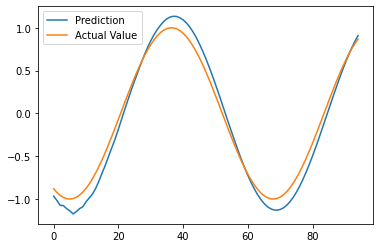

In [45]:
plt.plot(model_predictions, label = 'Prediction')
plt.plot(y_test, label = 'Actual Value')
plt.legend()